In [27]:

# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


In [28]:

# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'data/val',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


Found 17010 images belonging to 3 classes.
Found 2099 images belonging to 3 classes.


In [29]:

# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.15))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.1))
emotion_model.add(Dense(3, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])


In [30]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

callbacks = [earlystop]

In [31]:

# Train the neural network/model
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=17010 // 64,
        epochs=30,
        callbacks=callbacks,
        validation_data=validation_generator,
        validation_steps=2099 // 64)

# save model structure in jason file
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)


Epoch 1/30
265/265 [==============================] - 80s 299ms/step - loss: 1.0025 - accuracy: 0.4962 - val_loss: 0.8785 - val_accuracy: 0.5840
Epoch 2/30
265/265 [==============================] - 77s 290ms/step - loss: 0.8372 - accuracy: 0.6198 - val_loss: 0.7883 - val_accuracy: 0.6519
Epoch 3/30
265/265 [==============================] - 74s 279ms/step - loss: 0.7737 - accuracy: 0.6511 - val_loss: 0.7472 - val_accuracy: 0.6597
Epoch 4/30
265/265 [==============================] - 71s 269ms/step - loss: 0.7280 - accuracy: 0.6782 - val_loss: 0.6960 - val_accuracy: 0.6875
Epoch 5/30
265/265 [==============================] - 71s 269ms/step - loss: 0.6926 - accuracy: 0.6935 - val_loss: 0.6764 - val_accuracy: 0.6948
Epoch 6/30
265/265 [==============================] - 76s 288ms/step - loss: 0.6608 - accuracy: 0.7080 - val_loss: 0.6605 - val_accuracy: 0.7036
Epoch 7/30
265/265 [==============================] - 70s 263ms/step - loss: 0.6344 - accuracy: 0.7229 - val_loss: 0.6538 - val_ac

In [32]:
# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')

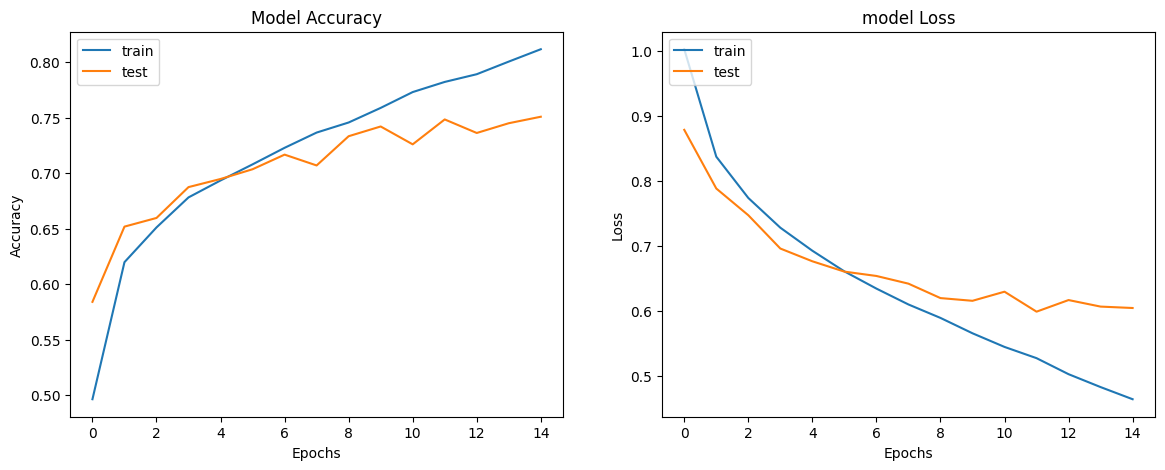

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
train_loss, train_accu = emotion_model.evaluate(train_generator)
test_loss, test_accu = emotion_model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

33/33 [==============================] - 2s 64ms/step - loss: 0.5973 - accuracy: 0.7480
final train accuracy = 81.09 , validation accuracy = 74.80
